### Import neccassary packages

In [1]:
import pandas as pd
import numpy as np
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown, HeatmapDropDown, InteractivePrice
from classes.model_analysis import validation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Identify the actual path of this jupyter file

In [2]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt


### Import data

In [3]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()

       domain             Country  Year       for  ForStock
0     ForArea             Algeria  2017    1430.0     128.0
1     ForArea              Angola  2017   57624.0    2251.0
2     ForArea               Benin  2017    4220.0     166.0
3     ForArea            Botswana  2017   10547.0     761.0
4     ForArea        Burkina Faso  2017    5246.0     247.0
...       ...                 ...   ...       ...       ...
1795  ForArea  Russian Federation  2060  859694.9   85610.7
1796  ForArea          Tajikistan  2060     461.2       0.0
1797  ForArea        Turkmenistan  2060    4591.1      20.3
1798  ForArea             Ukraine  2060   12149.7    5124.3
1799  ForArea          Uzbekistan  2060    3689.3     112.1

[1800 rows x 5 columns]


c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\import_data.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_gfpm[parameters.column_name_scenario.value]= 'world500'


### Plot predefined scenario results 

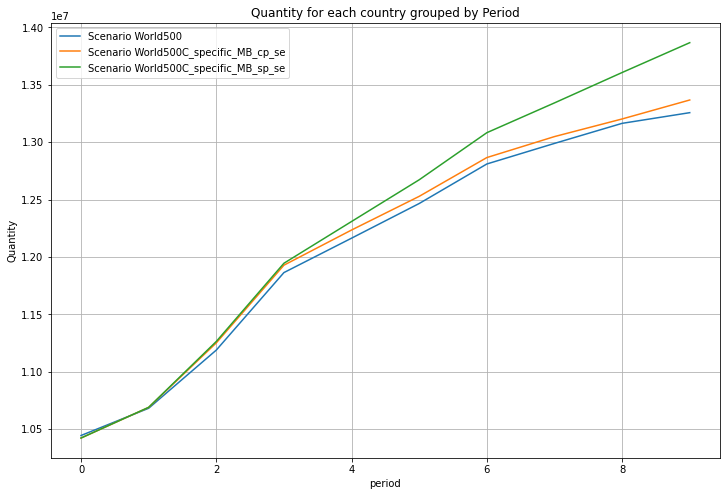

In [4]:
sc_plot = sc_plot()
sc_plot.predefined_plot(data["data_periods"])

### Interactive scenario results (quantities)

In [5]:
plot_dropdown_instance = PlotDropDown(data["data_periods"])

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

### Validation tables

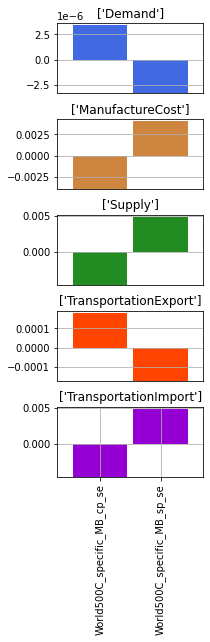

In [6]:
validation = validation()
data_vali = validation.model_difference(data=data["data_periods"])
data_quantities = validation.model_corrcoef(data["data_periods"])

### Interactive scenario results (prices)

In [7]:
price_interactive = InteractivePrice(data["data_periods"])

Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM'), value='Alle')

Dropdown(description='Select ID:', options=('Alle', 2, 3, 0), value='Alle')

Dropdown(description='Select Domain:', options=('Alle', 'Demand', 'TransportationExport', 'TransportationImpor…

Dropdown(description='Select CommodityCode:', options=('Alle', 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,…

Output()

Output()

### Forest Plots

       domain             Country  Year       for  ForStock
0     ForArea             Algeria  2017    1430.0     128.0
1     ForArea              Angola  2017   57624.0    2251.0
2     ForArea               Benin  2017    4220.0     166.0
3     ForArea            Botswana  2017   10547.0     761.0
4     ForArea        Burkina Faso  2017    5246.0     247.0
...       ...                 ...   ...       ...       ...
1795  ForArea  Russian Federation  2060  859694.9   85610.7
1796  ForArea          Tajikistan  2060     461.2       0.0
1797  ForArea        Turkmenistan  2060    4591.1      20.3
1798  ForArea             Ukraine  2060   12149.7    5124.3
1799  ForArea          Uzbekistan  2060    3689.3     112.1

[1800 rows x 5 columns]
       domain             Country  Year       for  ForStock
0     ForArea             Algeria  2017    1430.0     128.0
1     ForArea              Angola  2017   57624.0    2251.0
2     ForArea               Benin  2017    4220.0     166.0
3     ForArea  

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\import_data.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_gfpm[parameters.column_name_scenario.value]= 'world500'
c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\import_data.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_gfpm[parameters.column_name_scenario.value]= 'world500'


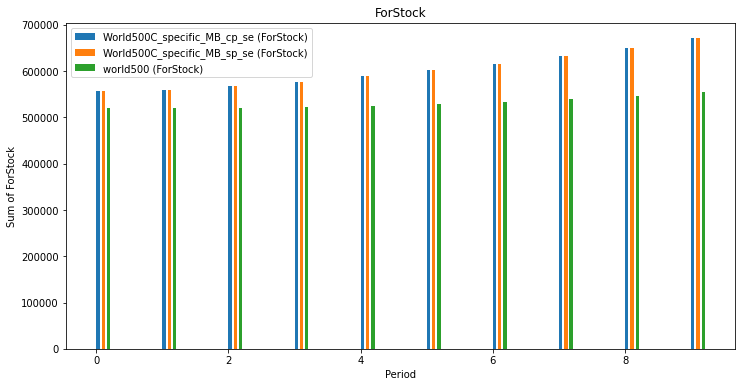

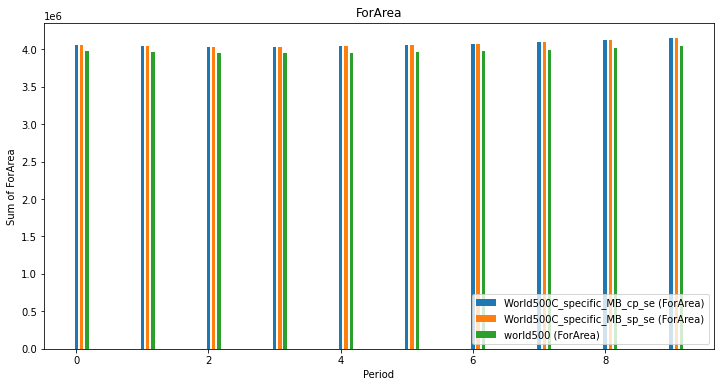

In [15]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
forest_data = data['Forest']
country_data = import_pkl.read_country_data()
forest_data_world = import_pkl.read_forest_data_gfpm(country_data=country_data)
forest_data = forest_data[forest_data_world.columns]
forest_data = pd.concat([forest_data, forest_data_world], axis= 0)

import matplotlib.pyplot as plt
class ForestData:
    def __init__(self, data):
        self.data = forest_data

    def drop_duplicates(self):
        self.data = self.data.drop_duplicates().reset_index(drop=True)


    def plot_stock_area_diagrams(self):
        scenarios = self.data['Scenario'].unique()
        total_periods = self.data['Period'].unique()

        plt.figure(figsize=(12, 6))
        bar_width = 0.05
        bar_gap = -0.42
        for i, scenario in enumerate(scenarios):
            scenario_name = self.data[self.data['Scenario'] == scenario]
            total_stock = scenario_name.groupby('Period')['ForStock'].sum()

            
            periods_runner = total_stock.index.intersection(total_periods)
            bar_positions = np.arange(len(periods_runner)) + i * (len(periods_runner) * bar_width + bar_gap)
            plt.bar(bar_positions, total_stock[periods_runner], label=f'{scenario} (ForStock)', width=bar_width, align='edge')

        #plt.ylim(ymin=3e6)
        plt.xlabel('Period')
        plt.ylabel('Sum of ForStock')
        plt.legend()
        plt.title('ForStock')
        plt.show()

        plt.figure(figsize=(12, 6))
        for i, scenario in enumerate(scenarios):
            scenario_name = self.data[self.data['Scenario'] == scenario]
            total_area = scenario_name.groupby('Period')['ForArea'].sum()

         
            periods_runner = total_area.index.intersection(total_periods)
            bar_positions = np.arange(len(periods_runner)) + i * (len(periods_runner) * bar_width + bar_gap)
            plt.bar(bar_positions, total_area[periods_runner], label=f'{scenario} (ForArea)', width=bar_width)

        #plt.ylim(ymin=3e7)
        plt.xlabel('Period')
        plt.ylabel('Sum of ForArea')
        plt.legend(loc = 'lower right')
        plt.title('ForArea')
        plt.show()


data_container = data
forest_plot = ForestData(data_container)
forest_plot.drop_duplicates()
forest_plot.plot_stock_area_diagrams()


### Worldmap

### Heatmap

In [ ]:
data_selection = data['data_periods']
heatmap_dropdown_instance = HeatmapDropDown(data=data_selection)

interactive(children=(Dropdown(description='Select Scenario:', options=('del_4_GR', 'del_4_GRFS', 'del_4_PE', …